In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----
color_map = ['#54BAB9', '#e8f3f6', '#d0e8ec', '#a2d1d9', '#73b4c6', '#4597b3', 
                        '#54BAB9', '#13688d', '#11637a', '#115e7a', '#0b3d53']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = ''' 

#head {
font-family: monospace
}

div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 50px">Getting <span style="color:#08bbcf">Libraries</span></h1>

In [3]:
!pip install plotly

In [4]:
!pip install pywaffle

     |████████████████████████████████| 565 kB 902 kB/s            


In [5]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from pywaffle import Waffle
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
%matplotlib inline

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 50px">Data <span style="color:#08bbcf">Checking</span></h1>

In [6]:
df = pd.read_csv('../input/iris/Iris.csv')

* Dropping the **Id** column as we don't need it.

In [7]:
df.drop('Id', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


* Checking for null values.

In [10]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 50px">Analysing the dataset: <span style="color:#08bbcf">EDA</span></h1>

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px">Species</h1>

In [11]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = px.pie(df, values=df['Species'].value_counts(), names=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'])
fig.update_traces(pull=[0.0, 0.1, 0.0], hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

📌 We see that we have an equal distribution of the target variable: `Species`. So, there is no need of upsampling or downsampling. We are good to go!

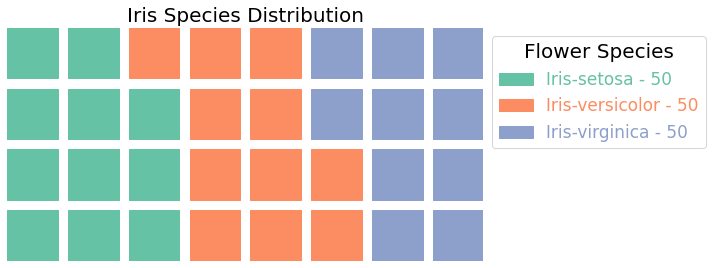

In [12]:
species = df['Species'].value_counts()

fig = plt.figure(
    FigureClass= Waffle,
    rows=4,
    columns=8,
    values=species,
    labels = ['{} - {}'.format(a, b) for a, b in zip(species.index, species)],
    legend = {
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1),
        'fontsize': 17,
        'labelcolor': 'linecolor',
        'title': 'Flower Species',
        'title_fontsize': 20
    },
    font_size=60,
    icon_legend=True,
    figsize=(10, 8)
)

plt.title('Iris Species Distribution', fontsize=20)
plt.show()

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px">Sepals & Petals Distribution</h1>

📌 Let's look at the summary of Sepals & Petals distribution visually.

In [13]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Violin(y=df['SepalLengthCm'], name='Sepal Length (cm)', line_color='black', fillcolor='gold'), row=1, col=1)
fig.add_trace(go.Violin(y=df['SepalWidthCm'], name='Sepal Width (cm)', line_color='black', fillcolor='mediumturquoise'), row=1, col=1)
fig.add_trace(go.Violin(y=df['PetalLengthCm'], name='Petal Length (cm)', line_color='black', fillcolor='darkorange'), row=1, col=2)
fig.add_trace(go.Violin(y=df['PetalWidthCm'], name='Petal Width (cm)', line_color='black', fillcolor='lightgreen'), row=1, col=2)
fig.update_traces(meanline_visible=True)
fig.show()

Text(0.5, 1.0, 'Sepal Width vs Sepal Length')

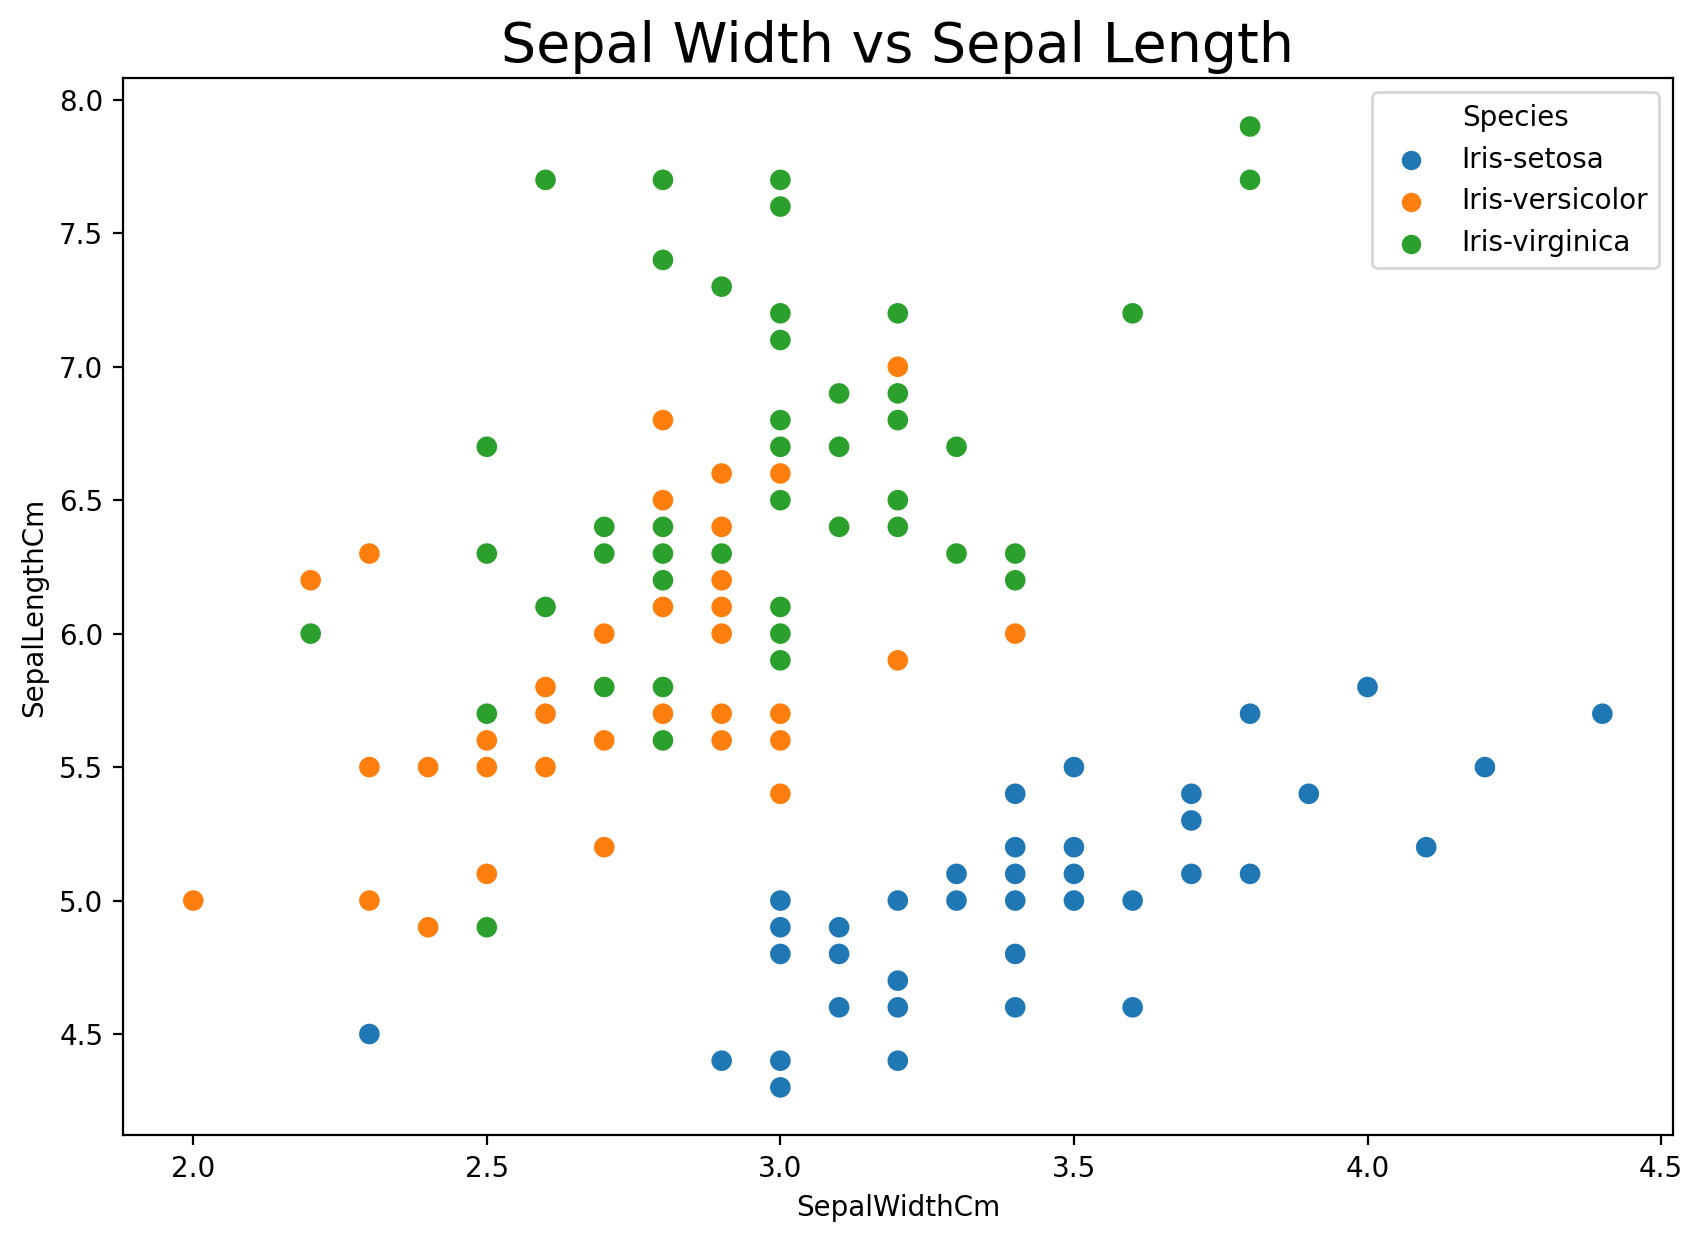

In [14]:
plt.figure(figsize=[10, 7], dpi=200)
sns.scatterplot(data=df, x='SepalWidthCm', y='SepalLengthCm', hue='Species', s=65)
plt.title('Sepal Width vs Sepal Length', fontsize=20)

Text(0.5, 1.0, 'Petal Width vs Petal Length')

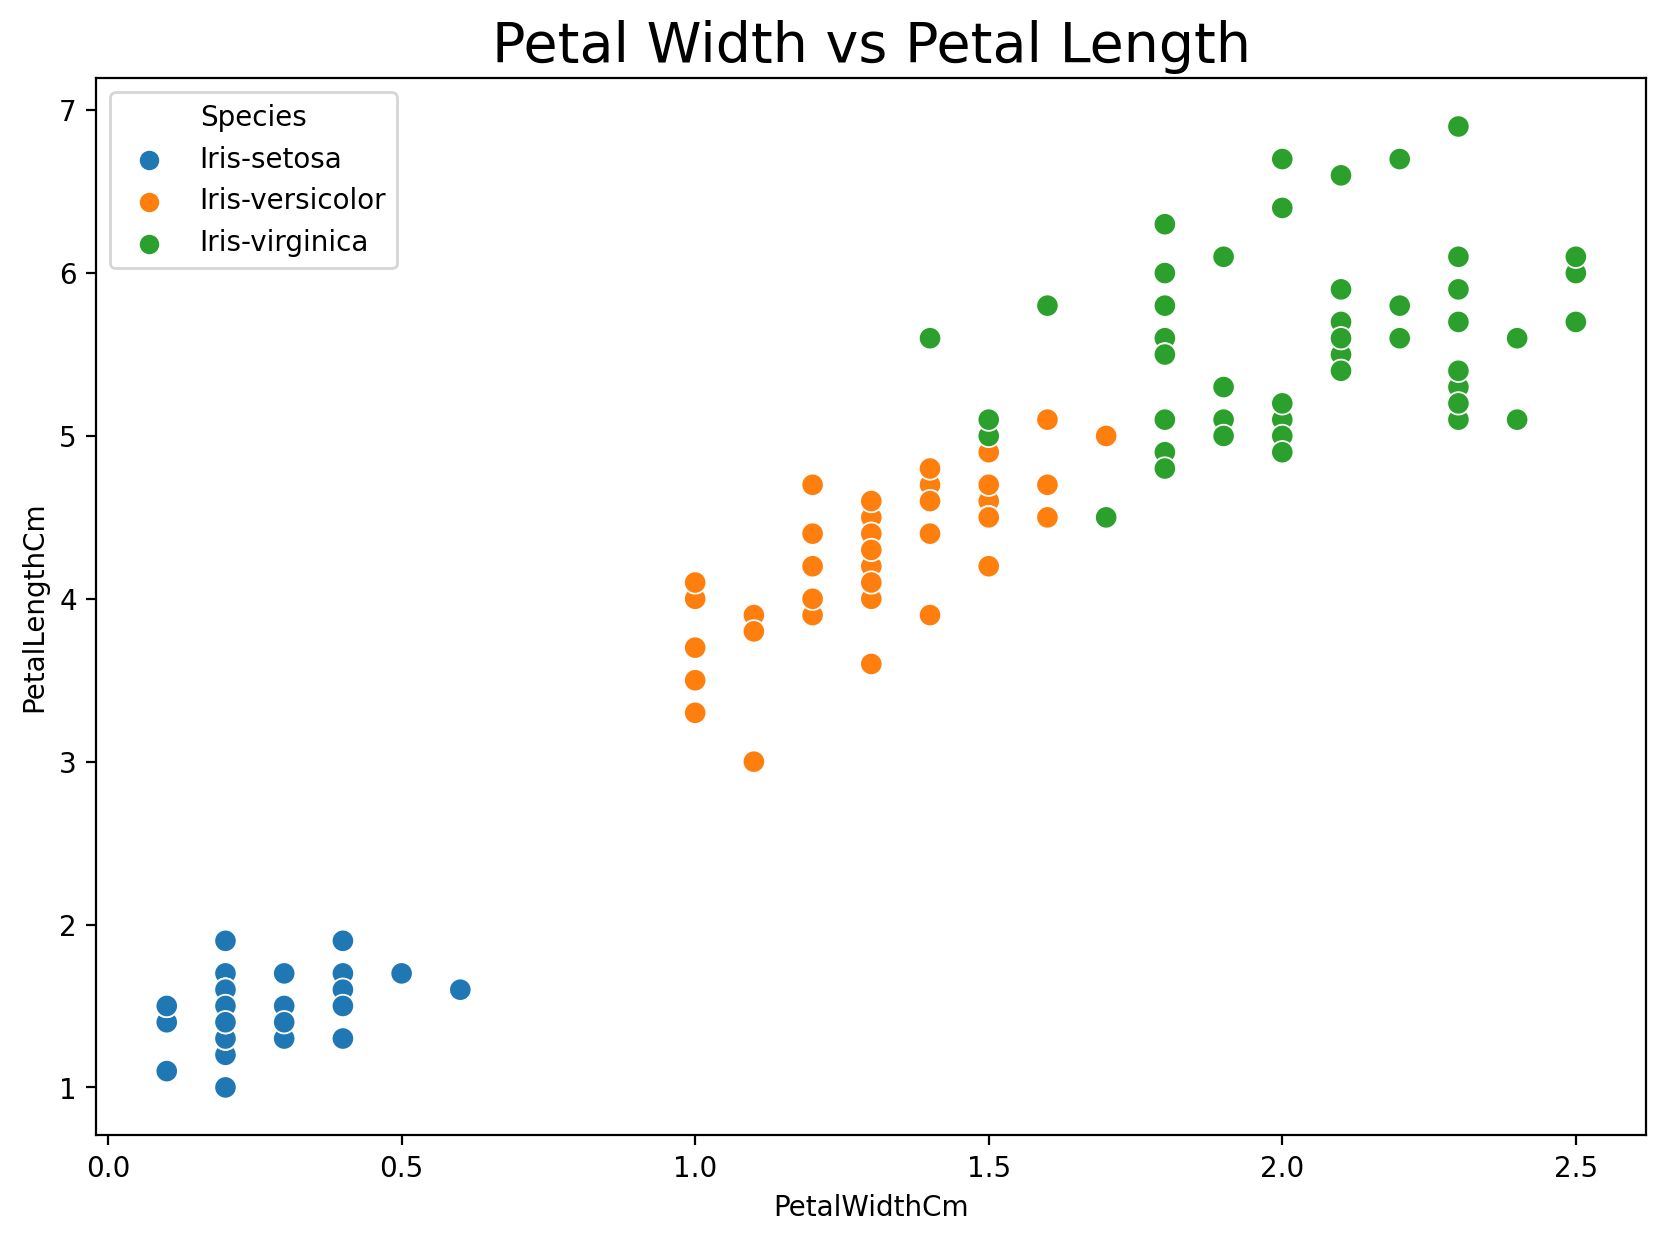

In [15]:
plt.figure(figsize=[10, 7], dpi=200)
sns.scatterplot(data=df, x='PetalWidthCm', y='PetalLengthCm', hue='Species', s=65)
plt.title('Petal Width vs Petal Length', fontsize=20)

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 50px">Checking for <span style="color:#08bbcf">Outliers</span></h1>

📌 **Outliers** are those values which don't follow the general trend of the data. Identifying **outliers** is and should be the first step in data cleaning & preprocessing. If not taken care of, they can cause serious headaches <span style="font-size: 30px">😱</span>.

So, let's see if there are any outliers in our dataset.

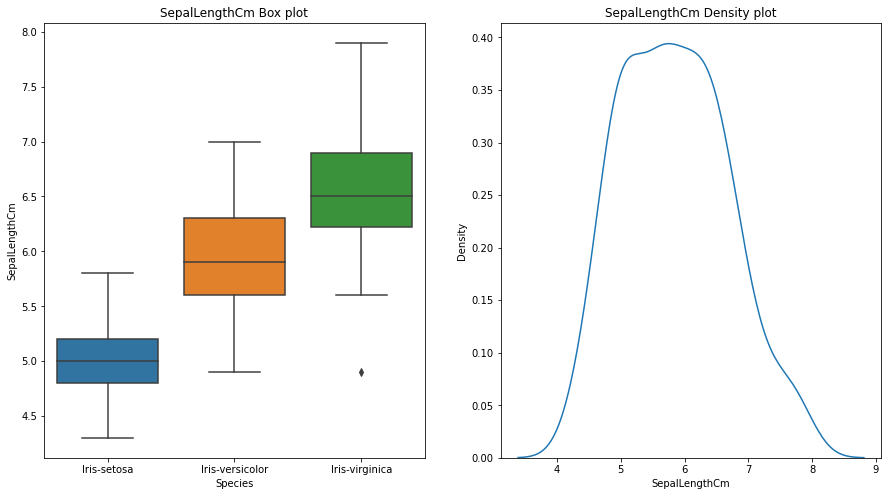

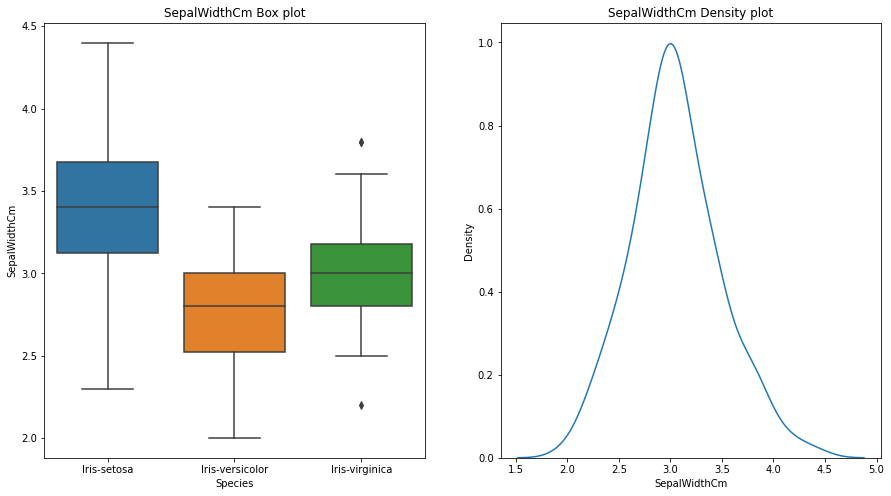

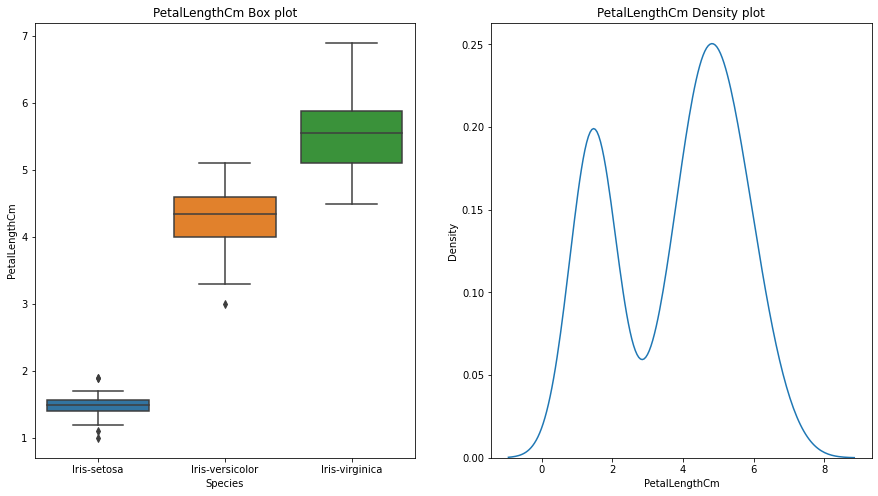

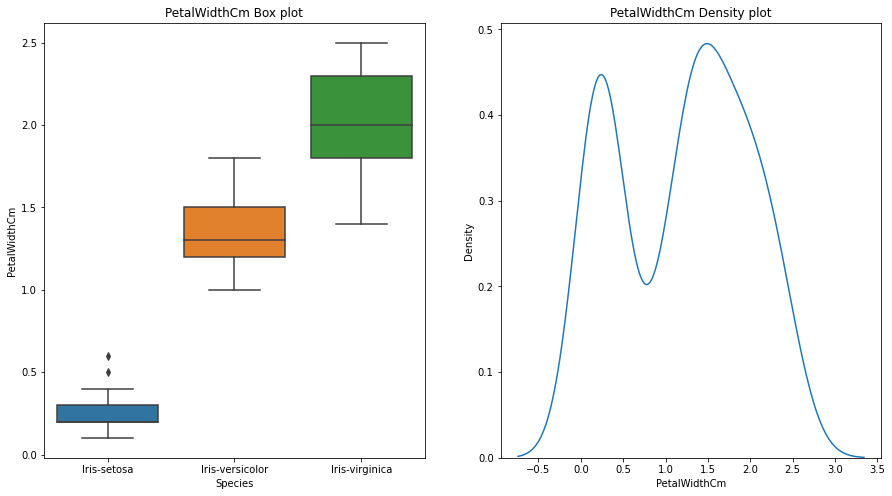

In [16]:
def feature_viz(feature):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x='Species', y=feature)
    plt.title(f'{feature} Box plot')
    
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[feature])
    plt.title(f'{feature} Density plot')

for i in df.drop(['Species'], axis=1):
    feature_viz(feature=i)

📌 Well, we see that Yes, we have outliers in our dataset. If we want, we can try to do **Standard Scaling** or other **scaling** methods or we can also remove the **row** containing that outlier.

📌 As, the outliers here are very few, I'll leave them and focus more on model building. But remember, always worry about **outliers**.

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px">Pairplot</h1>

📌 Want all the features plotted against each other easily? Well, seaborn's `pairplot` just does that!

📌 As the name says, it makes a plot of every pair in the dataset (`pair plot`) and displays it.

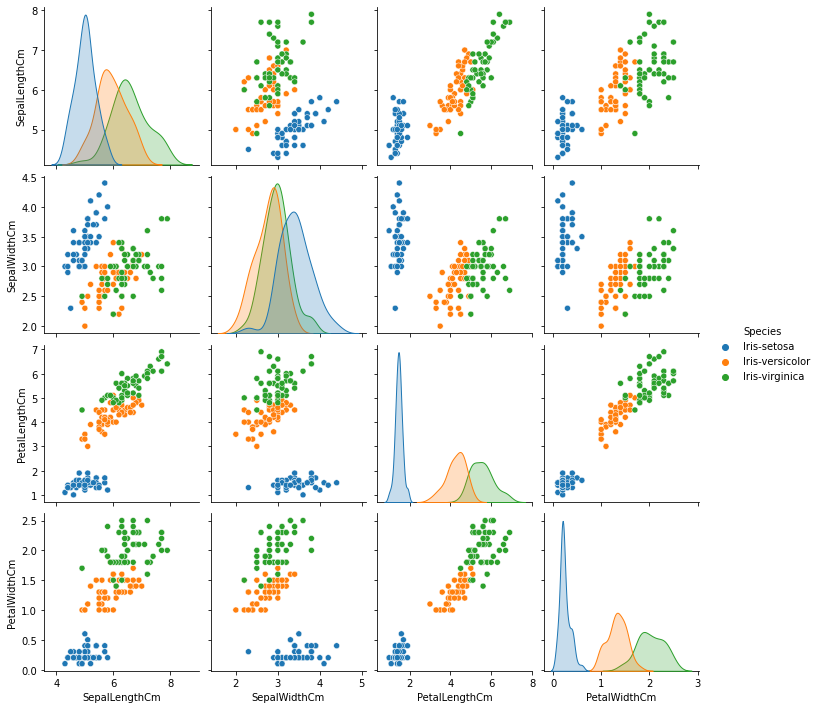

In [17]:
sns.pairplot(df, hue='Species')

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 50px">Model <span style="color:#08bbcf">Building</span></h1>

Now, we will build classification models for the Iris dataset. 
I'll first show the **Supervised Models** and then one **Unsupervised Model** called **KNN Clustering**.

**Supervised Models**

📌 **Logistic Regression**: Regression for Classification

📌 **K-Nearest Neighbors**: Uses the concept of nearest neighbors

📌 **Random Forest Classifier**: Gets a cumulative vote of a number of decision trees

📌 **XGBoost Classifier**: Optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. Provides a parallel tree boosting.

**Unsupervised Model**

📌 **KNN Clustering**

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px">Supervised <span style="color:#08bbcf">Models</span></h1>

📌 First we'll split the data using scikit-learn's `train_test_split` library.

📌 I'll also be using `cross_val_score` which just like `train_test_split` to get cross-validation score for better idea about our model.

In [18]:
x = df.drop('Species', axis=1)
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px"><span style="color:#08bbcf">Logistic</span> Regression</h1>

In [19]:
lr = LogisticRegression(max_iter=1000)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(lr, x, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.94 accuracy with a standard deviation of 0.04


<h3 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 20px">Accuracy (Logistic Regression): <span style="font-size: 30px; color:#08bbcf">94%</span></h3>

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px"><span style="color:#08bbcf">KNN</span> </h1>

In [20]:
knn = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(knn, x, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.96 accuracy with a standard deviation of 0.05


<h3 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 20px">Accuracy (KNN): <span style="font-size: 30px; color:#08bbcf">96%</span></h3>

📌 Now, let's change the parameter `n_neighbors`. In order to choose the best one, we'll follow the following path. We'll select that value of `n_neighbors` whose `f1 score` is highest & `Error rate` is lowest.

In [21]:
scores = []
errors = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    scores.append((i, round(f1_score(y_test, pred, average='weighted'), 4)))
    error = 1 - round(accuracy_score(y_test, pred), 4)
    errors.append((i, error))
    
scores_res = pd.DataFrame(scores, columns=['K', 'f1 Score'])
error_res = pd.DataFrame(errors, columns=['K', 'Error Rate'])

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px">Checking <span style="color:#08bbcf"><em>f1 Score</em></span> </h1>

Text(0.5, 1.0, 'KNN F1 Score')

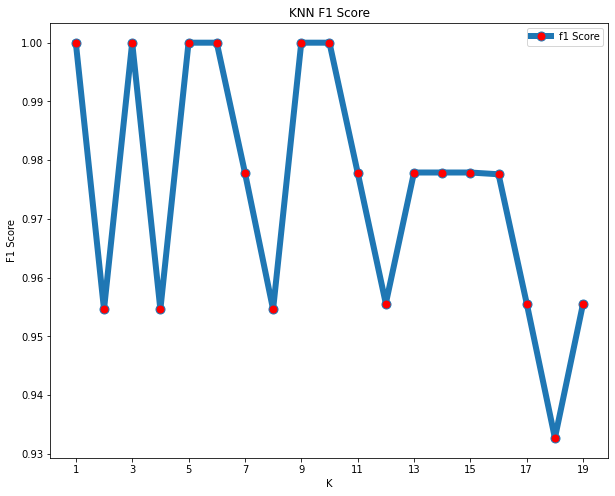

In [22]:
ax = scores_res.set_index('K').plot(figsize=[10, 8], linewidth=6, marker='o', mfc='r', markersize=9)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, 20, 2))
plt.title('KNN F1 Score')

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px">Checking <span style="color:#08bbcf"><em>Elbow Curve</em></span> </h1>

Text(0.5, 1.0, 'KNN Elbow Curve')

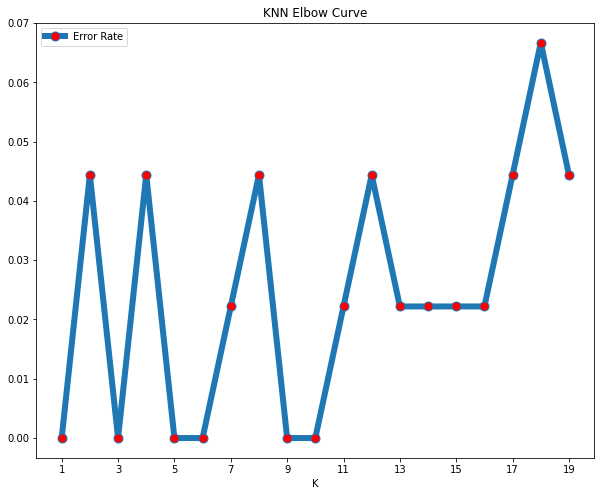

In [23]:
ax = error_res.set_index('K').plot(figsize=(10, 8), linewidth=6, marker='o', markersize=9, mfc='r')
ax.set_xticks(range(1, 20, 2))
plt.title('KNN Elbow Curve')

📌 So, we have many possible values for `n_neighbors`:  <span style="font-size: 20px; color: cyan"> 3, 5, 6, 9, 10</span>

📌 To select the best, enter all these values and check the accuracy. I got the best at `n_neighbors` = 9. So, I'll stick with it.

In [24]:
knn = KNeighborsClassifier(n_neighbors=9)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(knn, x, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.96 accuracy with a standard deviation of 0.04


<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px">Plotting <span style="color:#08bbcf">KNN</span> </h1>

📌 Let's plot the KNN when `n_neighbors` = 9.

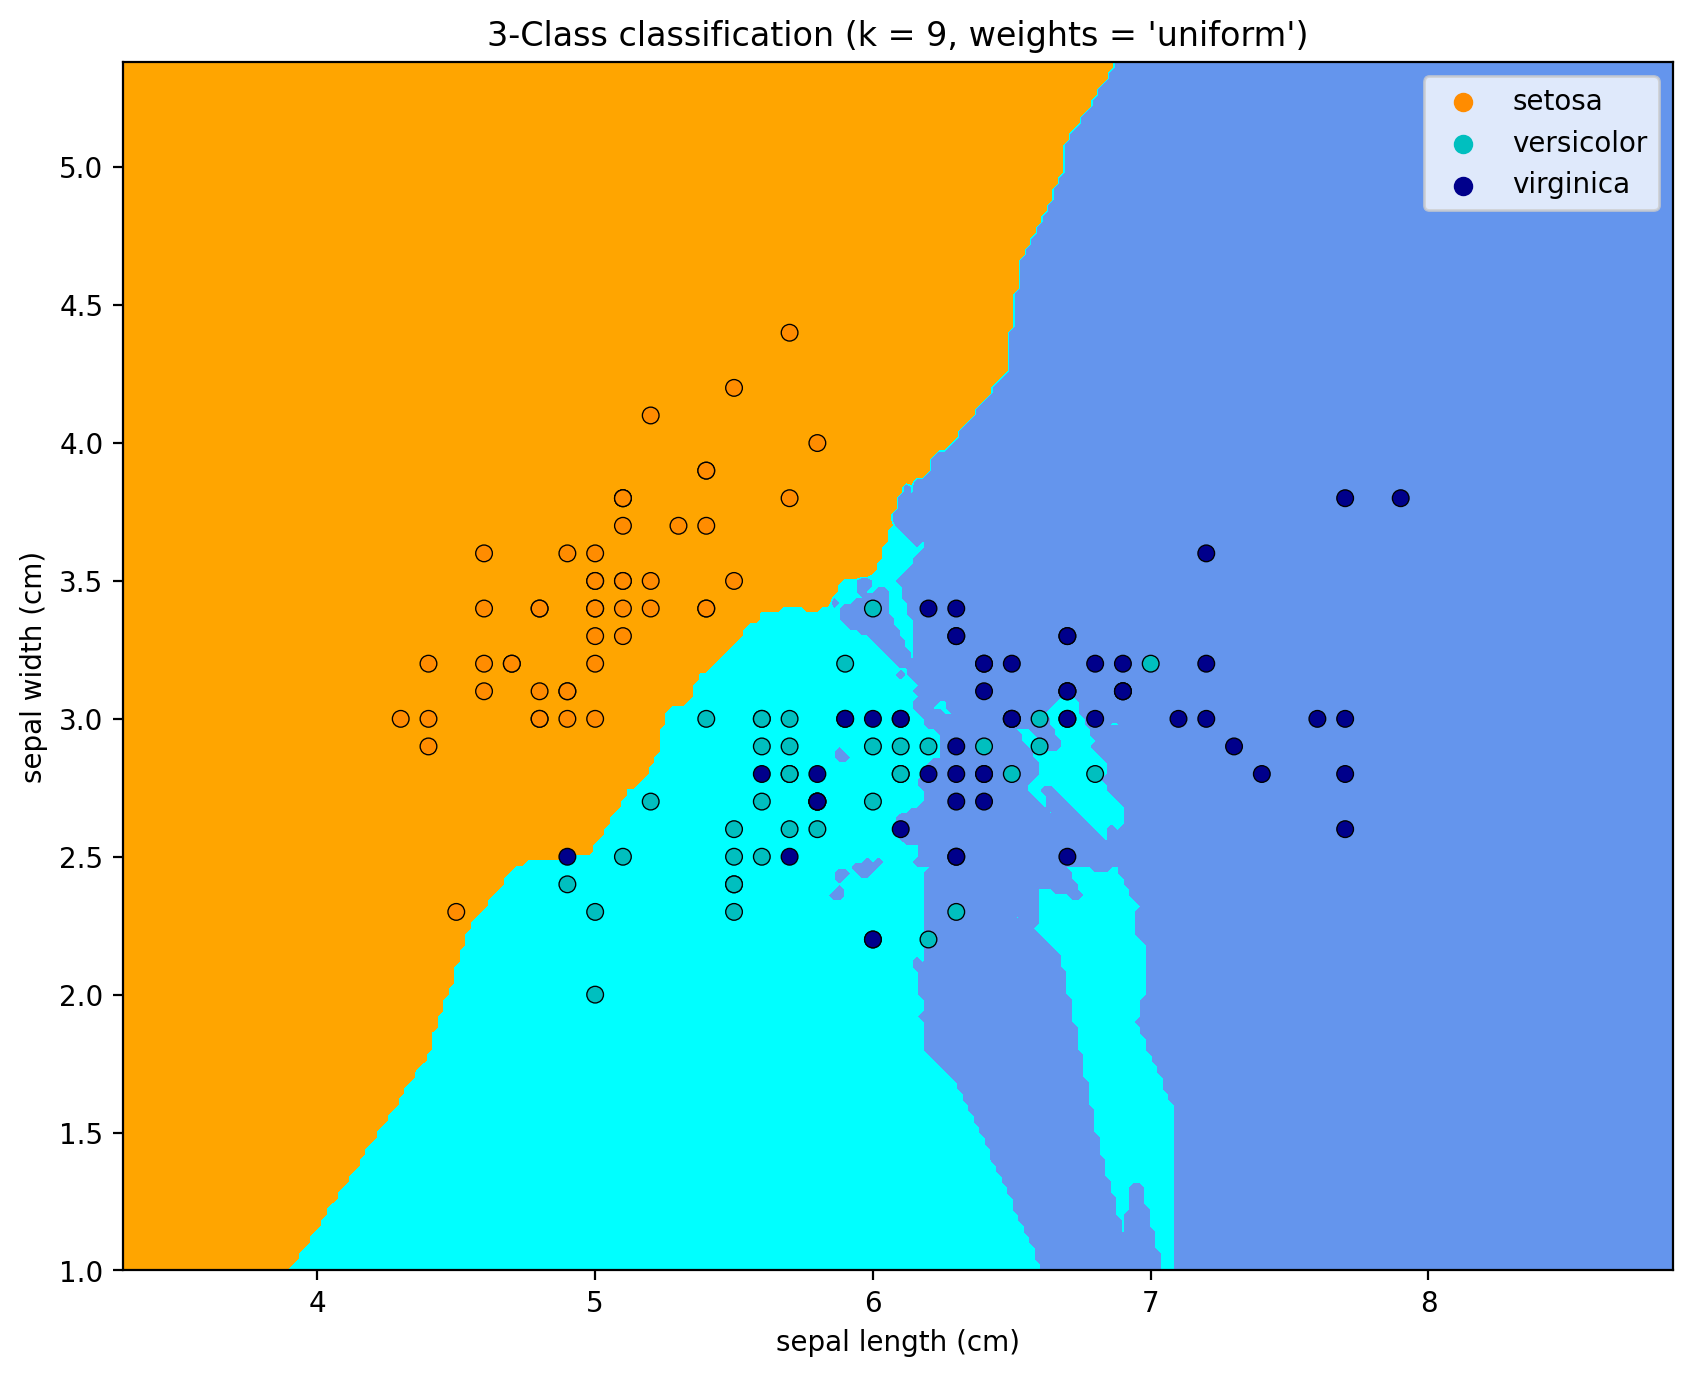

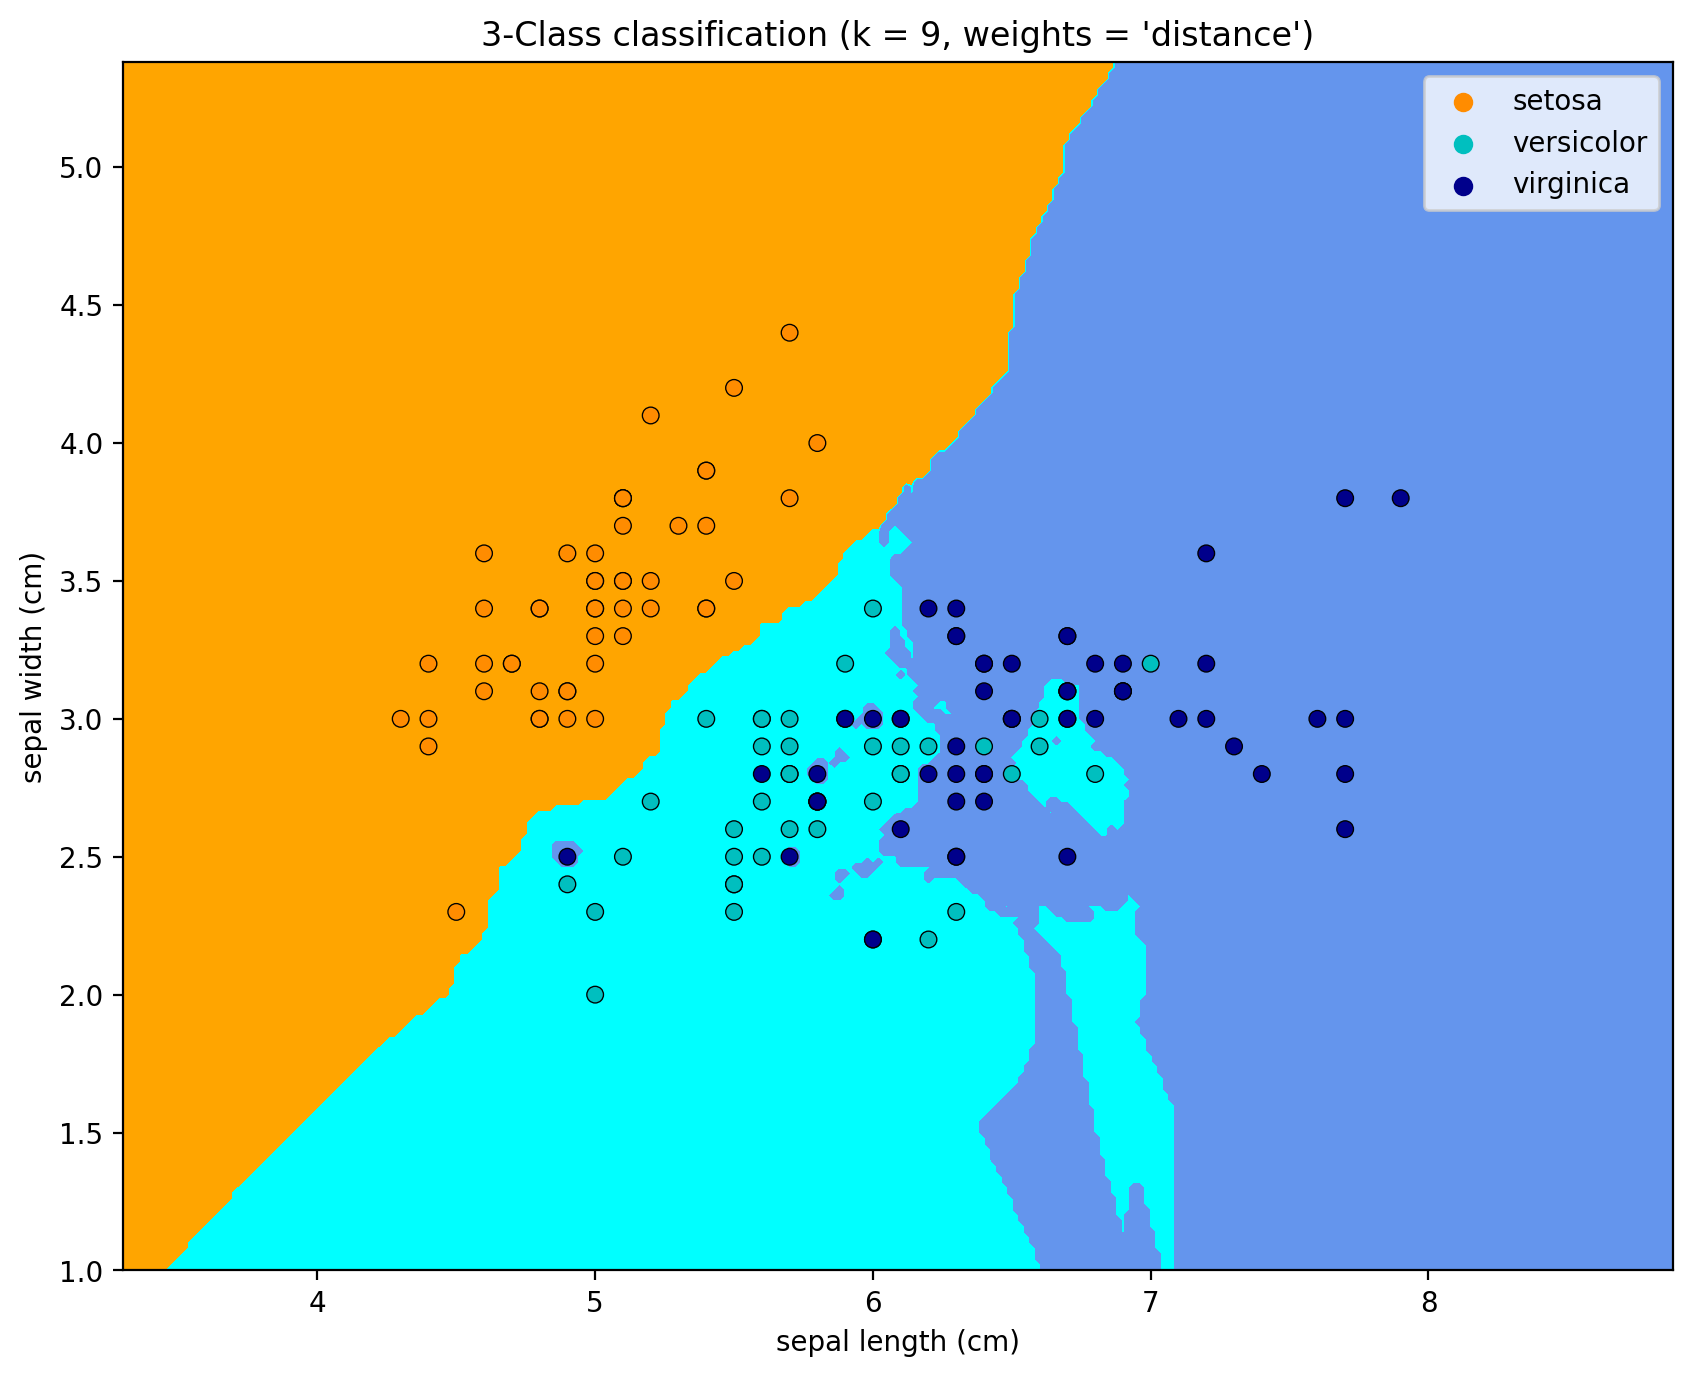

In [25]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

h = 0.02 
# creating color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    clf = KNeighborsClassifier(9, weights=weights)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 8), dpi=200)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (9, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
plt.show()

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px"><span style="color:#08bbcf">Random Forest</span> Classifier</h1>

In [26]:
rfc = RandomForestClassifier()
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(rfc, x, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.94 accuracy with a standard deviation of 0.02


<h3 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 20px">Accuracy (Random Forest): <span style="font-size: 30px; color:#08bbcf">94%</span></h3>

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px"><span style="color:#08bbcf">XGBoost</span> Classifier</h1>

In [27]:
xgb = XGBClassifier(verbosity=0)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=101)
score = cross_val_score(xgb, x, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.94 accuracy with a standard deviation of 0.03


<h3 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 20px">Accuracy (XGB Classifier): <span style="font-size: 30px; color:#08bbcf">94%</span></h3>

📌 Now, to know how XGB did the splits, we can also visualize it by calling the builtin `plot_tree` function. Remember, the plot can get confusing as the features increase.

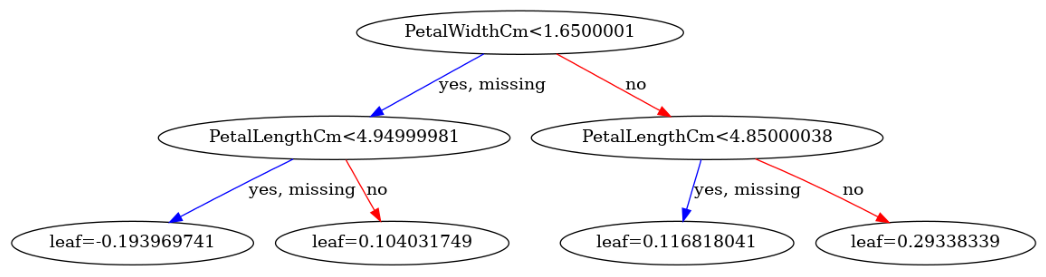

In [28]:
from xgboost import plot_tree
xgb = XGBClassifier(verbosity=0)
trainer = xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_acc = xgb.score(x_test, y_test)
plot_tree(xgb, num_trees=5)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px"><span style="color:#08bbcf">Unsupervised</span> Model</h1>

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px"><span style="color:#08bbcf">KNN </span>Clustering</h1>

📌 **LabelEncoder** can be used to encode **categorical** values to **numerical** values as all the Machine Learning models understand only numerical values. <span style="font-size: 30px">🥲</span>

In [29]:
df['Species'] = LabelEncoder().fit_transform(df['Species'])

📌 Now, in order to measure the accuracy of **KNN Clustering** we cannot use the traditional accuracy measures. Here, we use one of the measure **Inertia** to assess the accuracy of a clustering model. Lower the Inertia, the better the model.

In [30]:
val = df.iloc[:, [0, 1, 2, 3]].values

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(val)
    inertia.append(kmeans.inertia_)

📌 Let's follow the same method like **KNN Classification** for checking the best value.

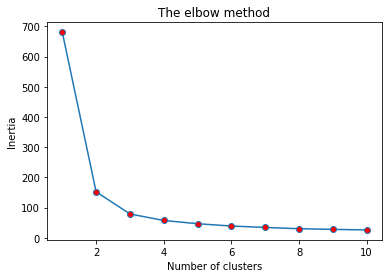

In [31]:
plt.plot(range(1, 11), inertia, marker='o', mfc='r')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

📌 Well the best is 3. We also need only 3 clusters as we have 3 types of target variables.

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit(val)
labels = y_kmeans.predict(val)

In [33]:
def display_cluster(X,km,num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    plt.figure(figsize=[10, 8])
    for i in range(num_clusters):
        plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=150, label=labels[i])
        plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = 'black', marker = 'o', s = 200)
    plt.legend()

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-weight:900; font-size: 30px">Plotting <span style="color:#08bbcf">Clusters</span> </h1>

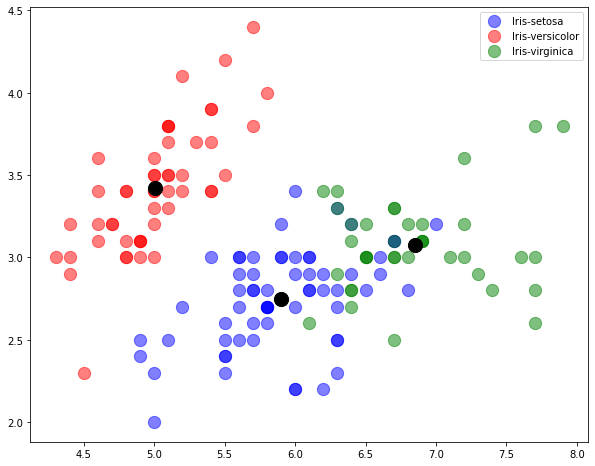

In [34]:
display_cluster(X=val, km=kmeans, num_clusters=3)

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-size: 20px"><span style="color:#08bbcf">Well that's it!</span> </h1>

<h1 style="font-family: 'Trebuchet MS', sans-serif; font-size: 20px"><span style="color:#08bbcf">If you enjoy reading my notebook, please leave an upvote and be sure to comment for any improvement! 😄</span> </h1>